In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
homeData = pd.read_csv('home_data.csv')

In [3]:
homeData.shape

(21613, 21)

In [4]:
homeData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
homeData.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
X = homeData.iloc[:,[3,4,5,8]].values
y = homeData['price'].values

In [7]:
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y.reshape(-1,1))

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
X

array([[-0.39873715, -1.44746357, -0.97983502, -0.08717263],
       [-0.39873715,  0.1756067 ,  0.53363434, -0.08717263],
       [-1.47395936, -1.44746357, -1.42625404, -0.08717263],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, -0.08717263],
       [-0.39873715,  0.50022075, -0.52252773, -0.08717263],
       [-1.47395936, -1.77207762, -1.15404732, -0.08717263]])

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [11]:
reg = LinearRegression().fit(x_train, y_train)

In [12]:
y_pred = reg.predict(x_test)

In [13]:
mean_squared_error(y_test, y_pred)

0.4658142050870147

In [14]:
transform_pred = sc.inverse_transform(y_pred)

In [15]:
transform_pred[:10]

array([[ 555735.17344716],
       [ 545129.08218884],
       [ 158926.88545476],
       [ 353609.20634962],
       [ 388787.7746597 ],
       [ 331035.26488847],
       [ 559365.88891053],
       [ 360533.62479963],
       [ 344884.10178848],
       [1437401.66553011]])

In [16]:
y_test_transform = sc.inverse_transform(y_test)

In [17]:
y_test_transform[:10]

array([[ 323000.],
       [ 690000.],
       [ 142000.],
       [ 560000.],
       [ 545000.],
       [ 259500.],
       [ 420000.],
       [ 305000.],
       [ 261500.],
       [1155000.]])

In [18]:
n = len(X)
X0 = np.ones(n)

In [19]:
X = np.array([X0, X[:,0], X[:,1], X[:,2], X[:,3]])

In [20]:
X.shape

(5, 21613)

In [21]:
X = X.T

In [22]:
X.shape

(21613, 5)

In [23]:
B = np.zeros(5)

In [24]:
B

array([0., 0., 0., 0., 0.])

In [25]:
y.shape

(21613, 1)

In [26]:
def cost_function(X,y,B):
    return np.sum((X.dot(B) - y) ** 2) / (2*n)

In [27]:
cost_function(X,y,B)

10806.499999999844

In [29]:
def gradientDescent(X,y,B,epochs,alpha):
    cost_history = [0] * epochs
    for i in range(epochs):
        y_pred = X.dot(B)
        loss = y_pred - y
        gd = (1/n) * X.T.dot(loss)
        B = B - alpha * gd
        cost_history[i] = cost_function(X,y,B)
    return cost_history, B

In [30]:
B = np.zeros(5)
epochs = 10000
alpha = 0.001
cost, newB = gradientDescent(X,y.flatten(),B,epochs,alpha)

In [31]:
newB

array([-1.94571236e-16, -1.20610776e-01,  5.16206330e-02,  7.03696660e-01,
        1.89915143e-01])

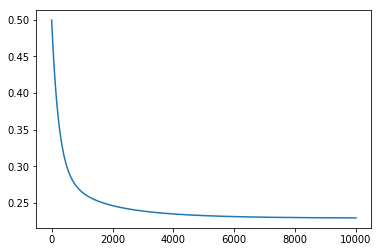

In [32]:
tempX = [i for i in range(epochs)]
plt.plot(tempX, cost)

In [33]:
pred = X.dot(newB)
mean_squared_error(y,pred)

0.45923388616218536

In [34]:
cost[0]

0.49906632694034153

In [35]:
cost[-1]

0.22961694308109268

In [36]:
newB

array([-1.94571236e-16, -1.20610776e-01,  5.16206330e-02,  7.03696660e-01,
        1.89915143e-01])